### **Importing Libraries and Modules**

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt

### **Exploring the Dataset**

In [2]:
df = pd.read_csv('prostate.csv')
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   100 non-null    float64
 1   age      100 non-null    int64  
 2   lbph     100 non-null    float64
 3   lcp      100 non-null    float64
 4   gleason  100 non-null    int64  
 5   lpsa     100 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 4.8 KB


,lcavol,age,lbph,lcp,gleason,lpsa
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.288660,63.770000,0.055756,-0.215573,6.740000,2.396477
std,1.212998,7.554322,1.451214,1.392363,0.719427,1.229514
min,-1.347074,41.000000,-1.386294,-1.386294,6.000000,-0.430783
25%,0.462157,60.000000,-1.386294,-1.386294,6.000000,1.686269
50%,1.432655,65.000000,0.085925,-0.798508,7.000000,2.568788
75%,2.086639,68.000000,1.542187,0.902861,7.000000,3.042105
max,3.821004,79.000000,2.326302,2.904165,9.000000,5.582932


Since there are no null values we need not do any imputation or Data cleaning too

### Selecting Features and target variable

In [3]:
X = df.iloc[:,1:6]
print(X)
y = df['lcavol']
print(y)

    age      lbph       lcp  gleason      lpsa
0    50 -1.386294 -1.386294        6 -0.430783
1    58 -1.386294 -1.386294        6 -0.162519
2    74 -1.386294 -1.386294        7 -0.162519
3    58 -1.386294 -1.386294        6 -0.162519
4    62 -1.386294 -1.386294        6  0.371564
..  ...       ...       ...      ...       ...
95   68  1.558145  1.558145        7  5.477509
96   68  0.438255  2.904165        7  5.582932
97   50 -1.386294 -1.386294        6 -0.430783
98   58 -1.386294 -1.386294        6 -0.162519
99   74 -1.386294 -1.386294        7 -0.162519

[100 rows x 5 columns]
0    -0.579818
1    -0.994252
2    -0.510826
3    -1.203973
4     0.751416
        ...   
95    2.882564
96    3.471966
97   -0.579818
98   -0.994252
99   -0.510826
Name: lcavol, Length: 100, dtype: float64


###**Splitting data in Test & Train**

In [4]:

X_train , X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=0)
print(X_train , y_train)


    age      lbph       lcp  gleason      lpsa
43   61 -1.386294  0.810930        7  2.374906
62   72 -1.386294  1.558145        9  2.853593
3    58 -1.386294 -1.386294        6 -0.162519
71   77  1.749200 -1.386294        7  3.037354
45   61  0.615186 -1.386294        7  2.553344
..  ...       ...       ...      ...       ...
96   68  0.438255  2.904165        7  5.582932
67   72  2.307573 -0.430783        7  2.962692
64   64 -1.386294 -1.386294        6  2.882004
47   68  1.713798 -0.430783        7  2.568788
44   66  1.749200 -0.430783        7  2.521721

[80 rows x 5 columns] 43    1.771557
62    2.775709
3    -1.203973
71    1.160021
45    1.663926
        ...   
96    3.471966
67    2.198335
64    2.073172
47    1.163151
44    1.486140
Name: lcavol, Length: 80, dtype: float64


## **Using the decision Tree regressor**

In [5]:
dtr = DecisionTreeRegressor(criterion = 'squared_error', random_state = 0)


### **Train** **Model**

In [6]:
model_dtr = dtr.fit(X_train , y_train)
depth =dtr.fit(X_train , y_train).get_depth()
depth

12

### **Test Model**

In [7]:
y_pred = model_dtr.predict(X_test)
y_pred

array([ 1.20597081,  2.53290285, -0.51082562,  0.51282363,  2.51365606,
        3.30284926,  1.20597081,  2.77570885,  0.54232429,  1.5623463 ,
        2.05923883,  1.73165554,  2.80759383,  1.20597081, -1.06415912,
        0.18232156,  1.14740245,  0.18232156,  1.14740245, -1.04982212])

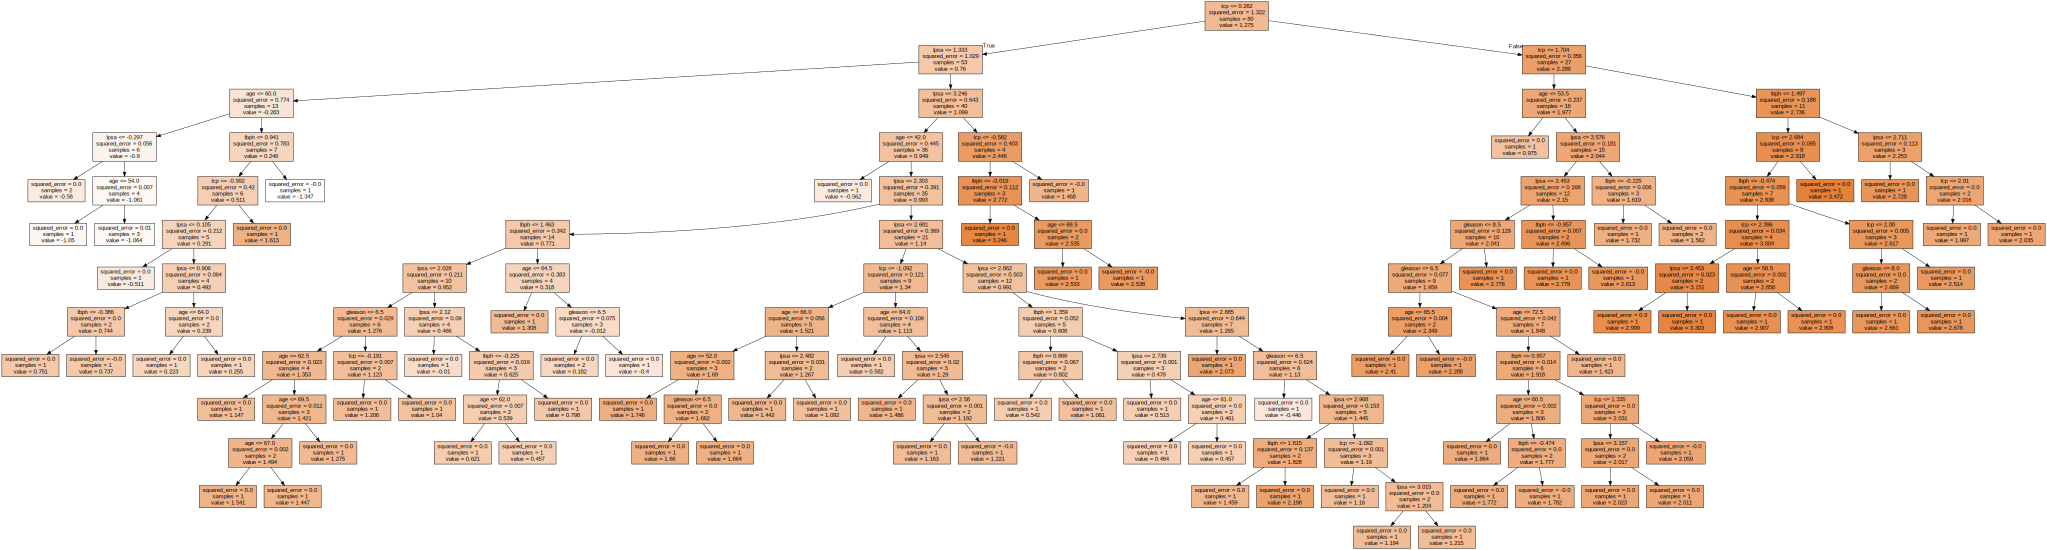

In [8]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dtr, feature_names=list(X), class_names=sorted(y.unique()), filled=True)
graphviz.Source(dot_data)

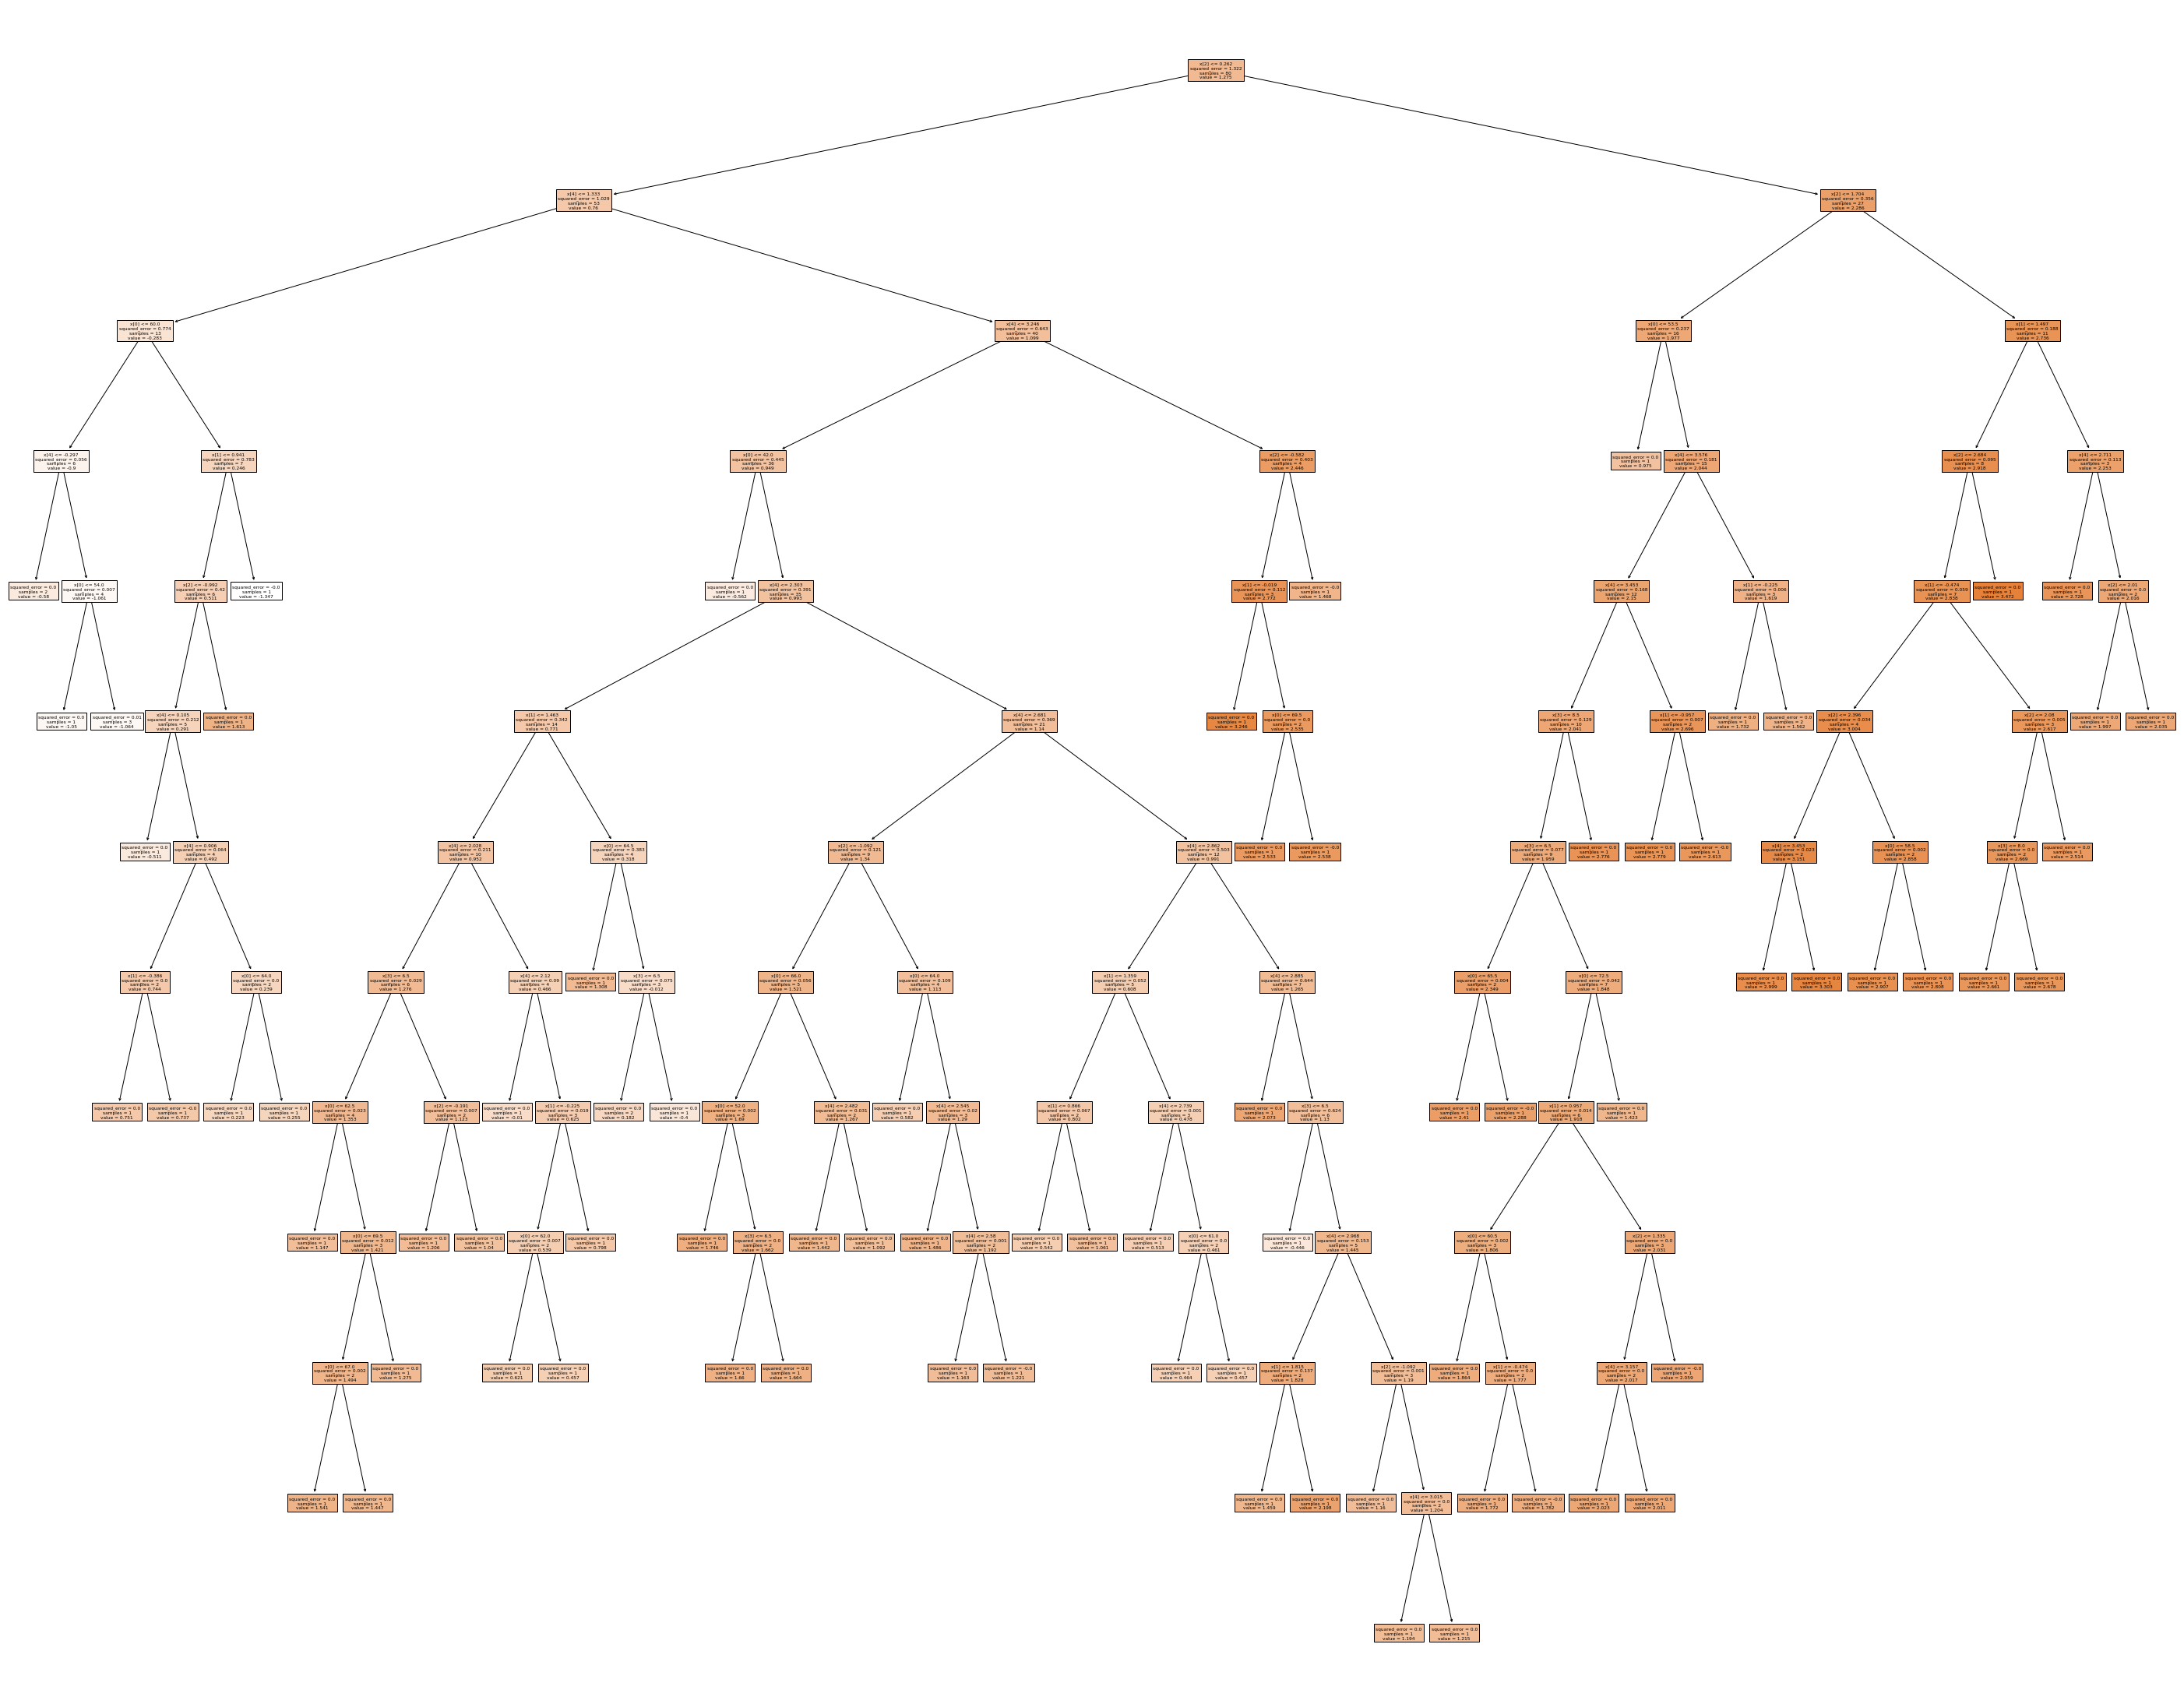

In [9]:
fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(dtr,filled=True)

## **Evaluating Perforamnce**

In [10]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 0.8177046102333335


In [11]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 1.1360315453802383
Root Mean Squared Error: 1.0658478059180112


In [12]:
# from sklearn.model_selection import KFold 
# kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 

# for train_index, test_index in kf.split(X):
#       print("Train:", train_index, "Validation:",test_index)
#       X_train, X_test = X[], X[test_index] 
#       y_train, y_test = y[train_index], y[test_index]

### **Performing K fold Cross Validation**

In [13]:
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

### **Pruning the tree**

In [14]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [2,3,4,5,6,7,8,9,10,11,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

gcv = GridSearchCV(estimator=model_dtr,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [15]:
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train r2 score {metrics.r2_score(y_train, y_train)}')
print(f'Test r2 score {metrics.r2_score(y_test, y_pred)}')

Train r2 score 1.0
Test r2 score 0.42907598752362175


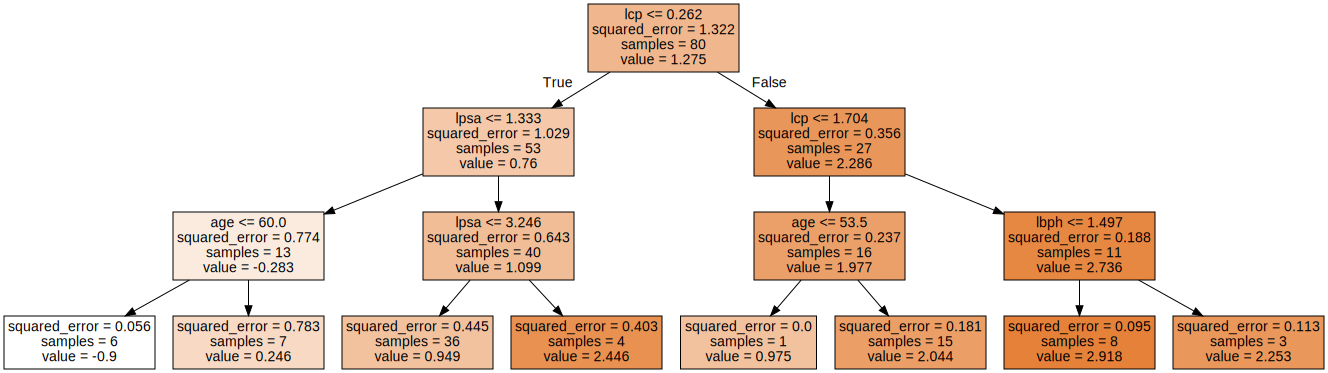

In [16]:
# tree.plot_tree(model)
# plt.show()
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(model, feature_names=list(X), class_names=sorted(y.unique()), filled=True)
graphviz.Source(dot_data)